**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import fsolve
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore', message='divide by zero encountered in reciprocal')
warnings.filterwarnings('ignore', message='invalid value encountered in reciprocal')
warnings.filterwarnings('ignore', message='Method Nelder-Mead cannot handle constraints')

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

import exam1 as ex

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
for G in ex.G_values:
    L_star = ex.optimal_labor_supply(ex.w_tilde, ex.kappa, ex.alpha, ex.v)
    print(f"For G = {G}, the optimal labor supply choice is {L_star}")


For G = 1.0, the optimal labor supply choice is 15.30165022719559
For G = 2.0, the optimal labor supply choice is 15.30165022719559


As shown above, the optimal labor supply choise for G=1.0 and for G=2.0 is 15.3017 given the expression in Question 1.

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

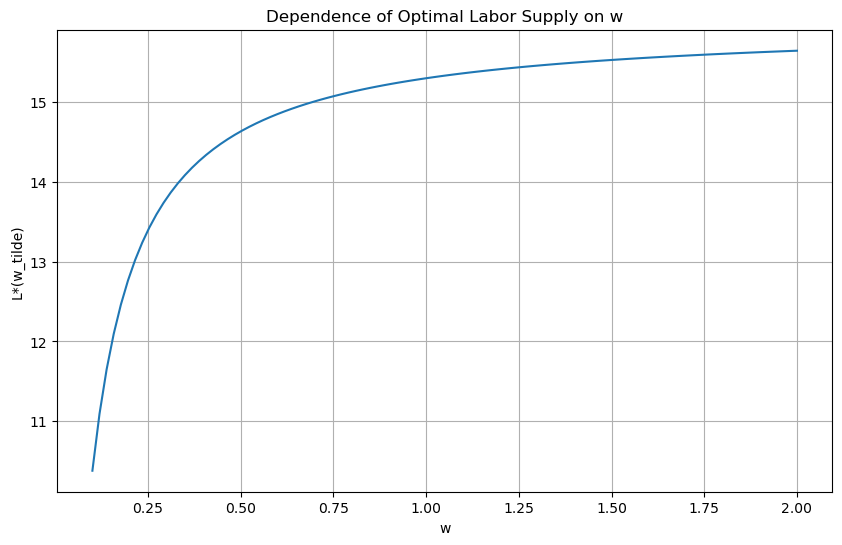

In [3]:
#Defining L^*(w)
L_star_values = [ex.optimal_labor_supply((1 - ex.tau) * ex.w, ex.kappa, ex.alpha, ex.v) for ex.w in ex.w_values]
#Formatting the appearence of the figure and adding labels and a title:
plt.figure(figsize=(10, 6))
plt.plot(ex.w_values, L_star_values)
plt.xlabel('w')
plt.ylabel('L*(w_tilde)')
plt.title('Dependence of Optimal Labor Supply on w')
plt.grid(True)
plt.show()

The figure shows how labor supply depends on the real wage. It can be seen that in the beginning the real wage has a big influence on labor supply, however as real wages increases labor supply stagnates. 


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [4]:
result = minimize(ex.negative_utility, 0.5, bounds=[(0.1, 0.9)])
optimal_tau = result.x[0]
print(f"The socially optimal tax rate is {optimal_tau}")


The socially optimal tax rate is 0.1


We have found that when we maximize worker utility, the social optimal tax rate is 10% 

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [5]:
for sigma, rho in zip(ex.sigma_values, ex.rho_values):
    G_solution = fsolve(ex.equilibrium, 1.0, args=(ex.w_tilde, ex.alpha, sigma, rho, ex.v, ex.epsilon))
    print(f"For sigma = {sigma} and rho = {rho}, the solution for G is {G_solution[0]}")

For sigma = 1.001 and rho = 1.001, the solution for G is 3.213346547711074
For sigma = 1.5 and rho = 1.5, the solution for G is 3.213346547711074


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [6]:
for sigma, rho in zip(ex.sigma_values, ex.rho_values):
    result = minimize(ex.negative_utility_with_equilibrium, 0.5, args=(ex.w, ex.alpha, sigma, rho, ex.v, ex.epsilon), bounds=[(0.1, 0.9)])
    optimal_tau = result.x[0]
    print(f"For sigma = {sigma} and rho = {rho}, the socially optimal tax rate is {optimal_tau}")


For sigma = 1.001 and rho = 1.001, the socially optimal tax rate is 0.9
For sigma = 1.5 and rho = 1.5, the socially optimal tax rate is 0.9


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [7]:
for kappa in ex.kappa_values_2:
    l_star = ex.optimal_labor_supply_2(kappa, ex.eta_2, ex.w_2)
    profit = ex.profits_2(kappa, l_star, ex.eta_2, ex.w_2)
    print(f"For kappa = {kappa}, the optimal labor supply choice is {l_star} and the profit is {profit}")

For kappa = 1.0, the optimal labor supply choice is 0.25 and the profit is 0.25
For kappa = 2.0, the optimal labor supply choice is 1.0 and the profit is 1.0


We have found that the optimal labor supply choice and the profit is 0.25 for kappa equal to 1.0. 
It is also found that the optimal labor supply choice and the profit is 1.0 for kappa equal to 2.0.

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [8]:
H_values = []
for k in range(ex.K_2):
    kappa_k = ex.kappa_series_2[k, :]
    l_prev = ex.optimal_labor_supply_2(kappa_k[0], ex.eta_2, ex.w_2)
    total_profit = ex.profits_2(kappa_k[0], l_prev, ex.eta_2, ex.w_2)
    for t in range(1, ex.T_2):
        l = ex.optimal_labor_supply_2(kappa_k[t], ex.eta_2, ex.w_2)
        total_profit += ex.R_2**(-t) * (ex.profits_2(kappa_k[t], l, ex.eta_2, ex.w_2) - (l != l_prev) * ex.iota_2)
        l_prev = l
    H_values.append(total_profit)
H = np.mean(H_values)
print(f"The ex ante expected value of the salon is {H}")

The ex ante expected value of the salon is 27.94261577757703


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [9]:
Delta = 0.005
H_values = []
for k in range(ex.K_2):
    kappa_k = ex.kappa_series_2[k, :]
    l_prev = ex.optimal_labor_supply_2(kappa_k[0], ex.eta_2, ex.w_2)
    total_profit = ex.profits_2(kappa_k[0], l_prev, ex.eta_2, ex.w_2)
    for t in range(1, ex.T_2):
        l_star = ex.optimal_labor_supply_2(kappa_k[t], ex.eta_2, ex.w_2)
        l = ex.policy(l_prev, l_star, Delta)
        total_profit += ex.R_2**(-t) * (ex.profits_2(kappa_k[t], l, ex.eta_2, ex.w_2) - (l != l_prev) * ex.iota_2)
        l_prev = l
    H_values.append(total_profit)
H = np.mean(H_values)
print(f"The ex ante expected value of the salon with Delta = {Delta} is {H}")

The ex ante expected value of the salon with Delta = 0.005 is 27.959420886165695


**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [10]:
def negative_H(Delta):
    H_values = []
    for k in range(ex.K_2):
        kappa_k = ex.kappa_series_2[k, :]
        l_prev = ex.optimal_labor_supply_2(kappa_k[0], ex.eta_2, ex.w_2)
        total_profit = ex.profits_2(kappa_k[0], l_prev, ex.eta_2, ex.w_2)
        for t in range(1, ex.T_2):
            l_star = ex.optimal_labor_supply_2(kappa_k[t], ex.eta_2, ex.w_2)
            l = ex.policy(l_prev, l_star, Delta)
            total_profit += ex.R_2**(-t) * (ex.profits_2(kappa_k[t], l, ex.eta_2, ex.w_2) - (l != l_prev) * ex.iota_2)
            l_prev = l
        H_values.append(total_profit)
    return -np.mean(H_values)

result = minimize(negative_H, 0.005, bounds=[(0.001, 0.01)])
optimal_Delta = result.x[0]
print(f"The optimal Delta is {optimal_Delta}")

The optimal Delta is 0.005



**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [11]:
H_values = []
for k in range(ex.K_2):
    kappa_k = ex.kappa_series_2[k, :]
    l_prev = ex.optimal_labor_supply_2(kappa_k[0], ex.eta_2, ex.w_2)
    total_profit = ex.profits_2(kappa_k[0], l_prev, ex.eta_2, ex.w_2)
    for t in range(1, ex.T_2):
        l_star = ex.optimal_labor_supply_2(kappa_k[t], ex.eta_2, ex.w_2)
        l = ex.alternative_policy(l_prev, l_star, optimal_Delta)
        total_profit += ex.R_2**(-t) * (ex.profits_2(kappa_k[t], l, ex.eta_2, ex.w_2) - (l != l_prev) * ex.iota_2)
        l_prev = l
    H_values.append(total_profit)
H = np.mean(H_values)
print(f"The ex ante expected value of the salon with the alternative policy is {H}")


The ex ante expected value of the salon with the alternative policy is 27.95942925029888


## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [12]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [20]:
#Return the result x^*.

print("Optimal solution:", ex.optimal_solution_3)
print("Optimal value:", ex.optimal_value_3)

# Show initial guesses and how they vary
for i, guess in enumerate(ex.initial_guesses):
    print("Iteration {}, initial guess: {}".format(i, guess))

Optimal solution: [  40.82021926 -119.83783226]
Optimal value: 4.0106564096939845
Iteration 0, initial guess: [ 528.25895701 -197.21206875]
Iteration 1, initial guess: [ -49.06244817 -302.3724495 ]
Iteration 2, initial guess: [221.10200131 227.79114678]
Iteration 3, initial guess: [-245.11627431 -239.82613865]
Iteration 4, initial guess: [ 127.82668673 -539.60073729]
Iteration 5, initial guess: [ 489.39158786 -186.70474522]
Iteration 6, initial guess: [-462.86351474  247.72254097]
Iteration 7, initial guess: [-256.72231972  123.1010146 ]
Iteration 8, initial guess: [  40.85483511 -119.89380851]
Iteration 9, initial guess: [ 411.38427078 -160.38080878]
Iteration 10, initial guess: [-181.86527567   13.75709591]
Iteration 11, initial guess: [ 13.92264883 416.75671652]
Iteration 12, initial guess: [-280.97260877 -327.82778942]
Iteration 13, initial guess: [464.38846141  15.29519541]
Iteration 14, initial guess: [377.49137599 460.00501721]
Iteration 15, initial guess: [-63.61276323 458.8661

The optimal solution is given by [40.82;-119.84], and the optimal value is 4.01. 
We have also shown how the initial guesses vary with the interation counter k. The inital guesses varies a lot during the diffent iterations, and it is not possible to see a clear connection.

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

To anwer the question: "Is it a better idea to set K=100? Is the convergense faster?" we should just change the value of $underlined_K$ to 100 from 10 and analyze it. However increasing the iterations of $underlined_K$ can potentially lead to better solutions, as we are sampling more initial points, increasing the chance of starting near the global minimum. But this does not necessarily mean that the convergence will be faster. 
In fact, increasing $underlined_K$ will likely increase the total runtime of your program, aswe are performing more optimization runs.